# Neural Networks (part 2)

## 1. Introduction 
In this notebook you create a NN for recognizing handwritten digits or fashion items.

#### Refrences:

***MNIST dataset***: Deng, L. (2012). The mnist database of handwritten digit images for machine learning research. IEEE Signal Processing Magazine, 29(6), 141–142.

***Fashion dataset***: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747


## 2. Loading the data

You make use of the MNIST or the Fashion-MINST dataset. **You get to choose one of them!** Both datasets consist of 70000 images of 28$\times$28 pixels (each pixel has a gray value 0 - 255). The dataset can be downloaded from the internet (see code below). In the text I reference to the images as numbers, if you do the fashion dataset, you can read here fashion items instead.

In [1]:
# importing the required modules
import numpy as np
import matplotlib.pyplot as plt

# to get matplot figures render correctly in the notebook use:
%matplotlib inline 

In [2]:
# Load data from https://www.openml.org/

from sklearn.datasets import fetch_openml

# Pick either the numbers or the fashion database here:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, parser='auto')
#X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)


X = X.T  # required as the rows should be the features and the columns the samples; shape (784, 70000).
y = y.astype('int')  # y has values as strings ('0', '1', ...'9') and we want integers (0, 1, ..., 9)

# inspect shape.
print(X.shape)
print(y.shape)


(784, 70000)
(70000,)


To have an idea of the data let's print a single sample

label = 0


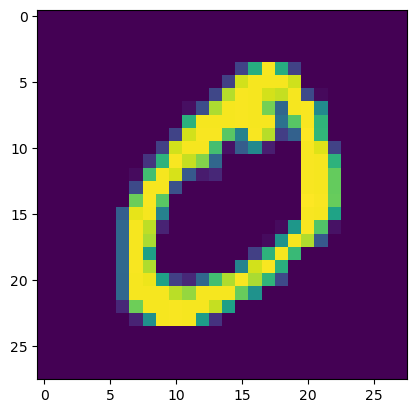

In [3]:
sample = X[:, 1]  # sample number 1
label = y[1]  # label of sample 1
plt.imshow(sample.reshape(28,28))  # need to reshape to a square image of 28 by 28
print(f'label = {label}')

## 3. Create the feature matrix X and labels matrix Y


In [4]:
# rescale feature matrix to values between 0 and 1
X_rescaled = X / 255.0
print(X)
# create one-hot encoded Y matrix
num_classes = len(np.unique(y))
Y = np.eye(num_classes)[y].T

# Inspect shape of rescaled X and one-hot encoded Y
print("Rescaled X shape:", X_rescaled.shape)
print("One-hot encoded Y shape:", Y.shape)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Rescaled X shape: (784, 70000)
One-hot encoded Y shape: (10, 70000)


In [5]:
# create a train, validation and test dataset
# for the test data set take the first 5000 samples
# for the train data set take sample 5001 to 60000
# for the validation set take sample 60001 to 70000

X_test = X_rescaled[:, :5000]
X_train = X_rescaled[:, 5001:60000]
X_valid = X_rescaled[:, 60001:70000]

Y_test = Y[:,:5000]
Y_train = Y[:,5001:60000]
Y_valid = Y[:,60001:70000]

# Inspect shapes of the datasets
print("Test set shapes:", X_test.shape, Y_test.shape)
print("Train set shapes:", X_train.shape, Y_train.shape)
print("Validation set shapes:", X_valid.shape, Y_valid.shape)


Test set shapes: (784, 5000) (10, 5000)
Train set shapes: (784, 54999) (10, 54999)
Validation set shapes: (784, 9999) (10, 9999)


## 4. The Neural Network

The NN that you will make has the following layout (this is something that will work, but feel free to make changes if you like):

- input layer ($l=0$): 784 nodes
- hidden layer ($l=1$): 300 nodes; ReLu activation function
- hidden layer ($l=2$): 100 nodes; ReLu activation function
- output layer ($l=3$): 10 nodes; Softmax activation function


### Define the activation functions

Below you define the required activation functions and their derivatives.

In [6]:
# define some activation functions

def relu(z):
    return np.maximum(0, z)

def relu_diff(z):
    return np.where(z > 0, 1, 0)

# Define softmax activation function

# define some activation functions

def sigmoid(z):
    """
    returns the sigmoid function of z

    Parameters
    ----------
    z : float or ndarray

    Returns
    -------
    out : same type and shape as z

    """
    
    return 1 / (1 + np.exp(-z))


def sigmoid_diff(z):
    """
    returns the derivative of the sigmoid function of z

    Parameters
    ----------
    z : float or ndarray

    Returns
    -------
    out : same type and shape as z

    """
    
    return sigmoid(z) * (1 - sigmoid(z))


def softmax(z):
    """
    returns the softmax function of z

    Parameters
    ----------
    z : 2D ndarray

    Returns
    -------
    out : same type and shape as z

    """
    
    return np.exp(z) / np.sum(np.exp(z), axis=0, keepdims=True)


### Initalize the weights and biases


In [7]:
# intialize the neural network
rng = np.random.default_rng()

# number of nodes in each layer
n_input = 784
n_hidden1 = 300
n_hidden2 = 100
n_output = 10

# input layer
# no weights and biases

# hidden layer 1 
W1 = rng.normal(0, 1/np.sqrt(n_input), (n_hidden1, n_input))
b1 = np.zeros((n_hidden1, 1))
# hidden layer 2 
W2 = rng.normal(0, 1/np.sqrt(n_hidden1), (n_hidden2, n_hidden1))
b2 = np.zeros((n_hidden2, 1))
# output layer 
W3 = rng.normal(0, 1/np.sqrt(n_hidden2), (n_output, n_hidden2))
b3 = np.zeros((n_output, 1))

## 5. Train the NN

Firt you define three parameters that can be adjusted for optimal training.
- **learning_rate**: determines to what extend we update the weights and biases in the gradient descent step
- **no_epochs**: the number of times we pass the training data set through the network for training
- **batch_size**: how many samples we pass through the network before doing a gradient descent update

In [8]:
# train settings
learning_rate = 0.01
no_epochs = 100 #if we increase the value it will be too slow and i guess we have nice accuracy with this value
batch_size = 64

Below you implement the training of the network. As a start copy and paste your code from part 1. Note that we use the **Cross Entropy** (CE) loss function.

Epoch 10/100, Training Accuracy: 0.5689739813451153, Training Loss: 1.8229525013626338
Epoch 20/100, Training Accuracy: 0.7181948762704776, Training Loss: 1.260257242832202
Epoch 30/100, Training Accuracy: 0.7834687903416426, Training Loss: 0.9121399612947283
Epoch 40/100, Training Accuracy: 0.8129784177894144, Training Loss: 0.7349738848966334
Epoch 50/100, Training Accuracy: 0.82905143729886, Training Loss: 0.6374153888465127
Epoch 60/100, Training Accuracy: 0.8386516118474882, Training Loss: 0.579372088906046
Epoch 70/100, Training Accuracy: 0.8441971672212222, Training Loss: 0.5419081843756294
Epoch 80/100, Training Accuracy: 0.8489972544955363, Training Loss: 0.5164915799731195
Epoch 90/100, Training Accuracy: 0.8524336806123748, Training Loss: 0.49864798757209755
Epoch 100/100, Training Accuracy: 0.855161002927326, Training Loss: 0.4857520503214186


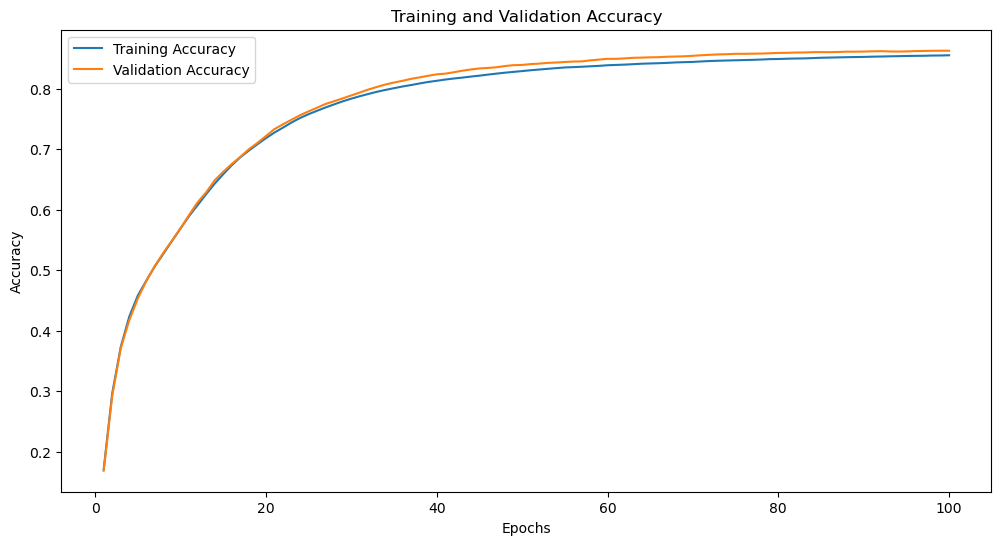

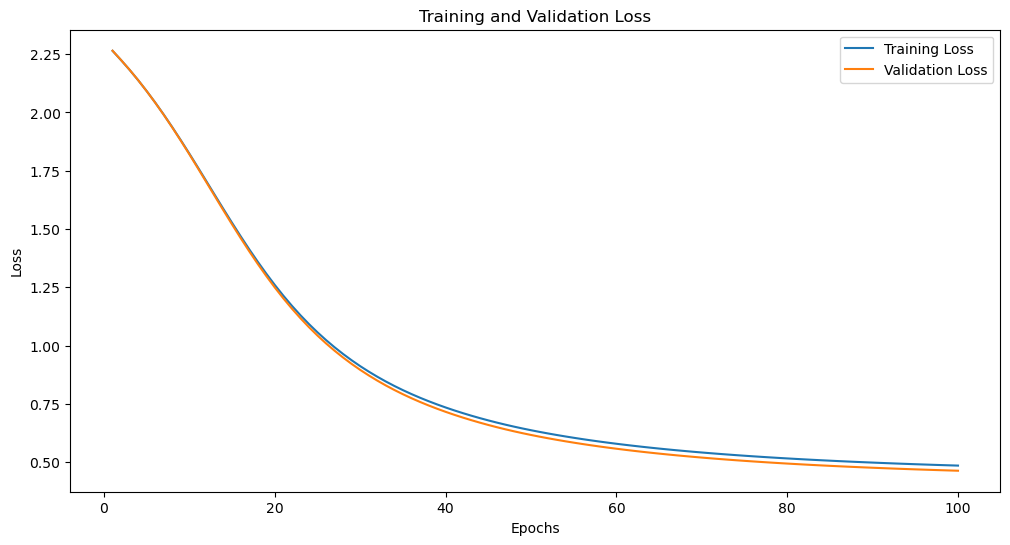

In [9]:
# Perform the training
num_samples = X_rescaled.shape[0]
training_set = np.arange(0, num_samples, batch_size)
train_accuracies = []  # Store train accuracies for later analysis
train_losses = []
valid_accuracies = []  # Store validation accuracies for later analysis
valid_losses = []

for epoch in range(1, no_epochs + 1):
    #print("Epoch:", epoch)
    # Loop over all batches in the training set
    for every_batch in training_set:
        for start_idx in range(every_batch, every_batch + batch_size):
            X_batch = X_train[:, start_idx:start_idx + 1]  # Select one sample at a time
            Y_batch = Y_train[:, start_idx:start_idx + 1]

            # Forward pass
            Z1_train = np.dot(W1, X_batch) + b1
            A1_train = relu(Z1_train)
            Z2_train = np.dot(W2, A1_train) + b2
            A2_train = relu(Z2_train)
            Z3_train = np.dot(W3, A2_train) + b3
            A3_train = softmax(Z3_train)

            # Backward pass
            dZ3 = A3_train - Y_batch  # Remove the transpose operation
            dW3 = np.dot(dZ3, A2_train.T) / batch_size  # Transpose A2_train
            db3 = np.sum(dZ3, axis=1, keepdims=True) / batch_size
            dA2 = np.dot(W3.T, dZ3)

            dZ2 = dA2 * relu_diff(Z2_train)
            dW2 = np.dot(dZ2, A1_train.T) / batch_size
            db2 = np.sum(dZ2, axis=1, keepdims=True) / batch_size
            dA1 = np.dot(W2.T, dZ2)
            dZ1 = dA1 * relu_diff(Z1_train)
            dW1 = np.dot(dZ1, X_batch.T) / batch_size
            db1 = np.sum(dZ1, axis=1, keepdims=True) / batch_size

            # Update weights and biases
            W3 -= learning_rate * dW3
            b3 -= learning_rate * db3
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            
    # Forward pass for evaluating accuracy and loss after each epoch for validation set
    Z1_valid = np.dot(W1, X_valid) + b1
    A1_valid = relu(Z1_valid)
    Z2_valid = np.dot(W2, A1_valid) + b2
    A2_valid = relu(Z2_valid)
    Z3_valid = np.dot(W3, A2_valid) + b3
    A3_valid = softmax(Z3_valid)
    predictions_valid = np.argmax(A3_valid, axis=0)
    accuracy_valid = np.mean(predictions_valid == np.argmax(Y_valid, axis=0))
    valid_accuracies.append(accuracy_valid)

    loss_valid = -np.mean(np.sum(Y_valid * np.log(A3_valid), axis=0))
    valid_losses.append(loss_valid)
 
    # Forward pass for evaluating accuracy and loss after each epoch for training set
    Z1_train = np.dot(W1, X_train) + b1
    A1_train = relu(Z1_train)
    Z2_train = np.dot(W2, A1_train) + b2
    A2_train = relu(Z2_train)
    Z3_train = np.dot(W3, A2_train) + b3
    A3_train = softmax(Z3_train)
    predictions_train = np.argmax(A3_train, axis=0)
    accuracy_train = np.mean(predictions_train == np.argmax(Y_train, axis=0))
    train_accuracies.append(accuracy_train)

    loss_train = -np.mean(np.sum(Y_train * np.log(A3_train), axis=0))
    train_losses.append(loss_train)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{no_epochs}, Training Accuracy: {accuracy_train}, Training Loss: {loss_train}")

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, no_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, no_epochs + 1), valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, no_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, no_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## 6. Analyze the result
Make a plot of the training and validation loss and training and validation accuracy as function of the epoch.

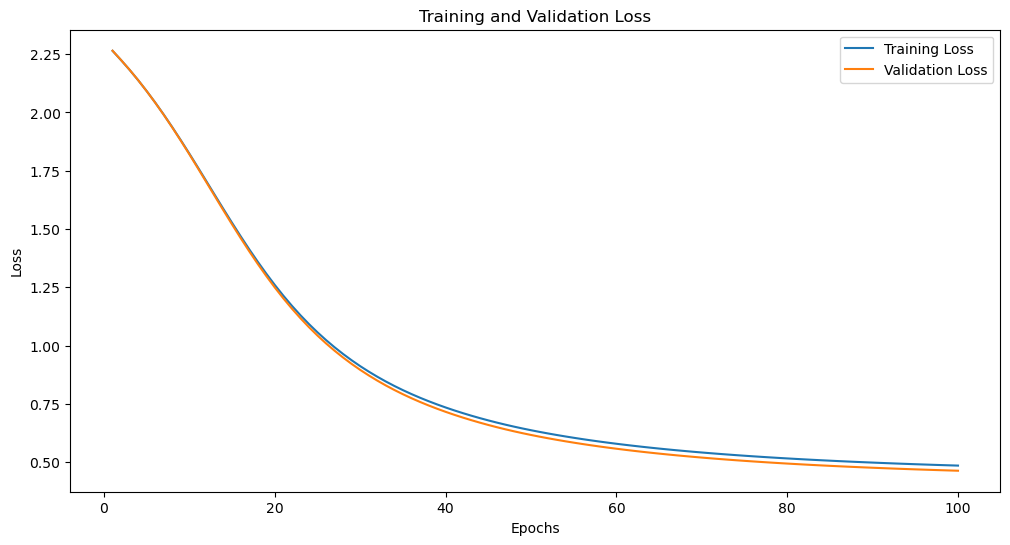

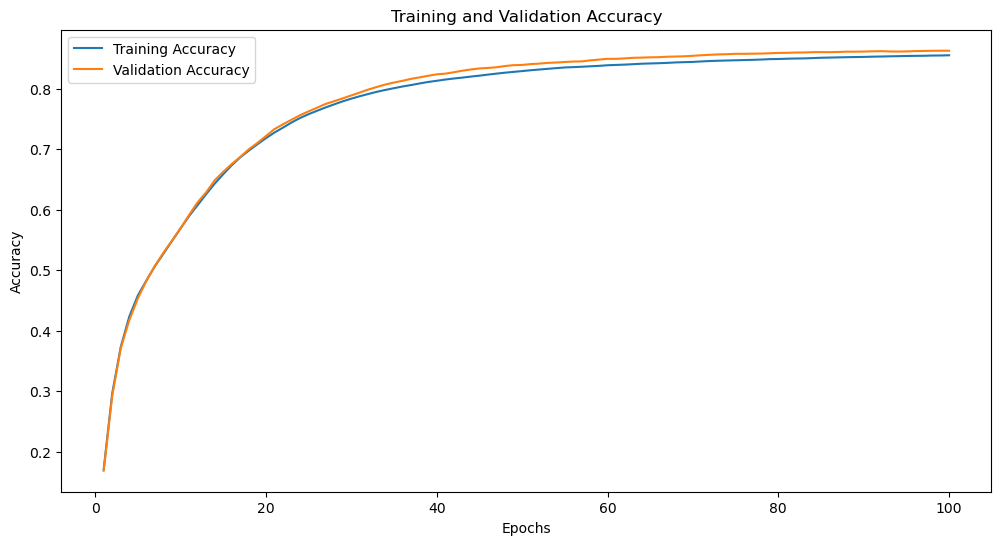

In [10]:
import matplotlib.pyplot as plt

# Plot the loss
plt.figure(figsize=(12, 6))
plt.plot(range(1, no_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, no_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, no_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, no_epochs + 1), valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


Adapt the hyperparameters and/or NN layout to try to improve the result.

Finally use the test set to check the performance of the model

In [11]:
# compute the accuracy and losses of the test set
# Forward pass on the test set
Z1_test = np.dot(W1, X_test) + b1
A1_test = relu(Z1_test)
Z2_test = np.dot(W2, A1_test) + b2
A2_test = relu(Z2_test)
Z3_test = np.dot(W3, A2_test) + b3
A3_test = softmax(Z3_test)

# Compute test loss
test_loss = -np.mean(np.sum(Y_test * np.log(A3_test), axis=0))

# Compute test accuracy
predictions_test = np.argmax(A3_test, axis=0)
true_labels_test = np.argmax(Y_test, axis=0)
test_accuracy = np.mean(predictions_test == true_labels_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Test Loss: 0.4625510261332158
Test Accuracy: 0.8628


Finally it is interesting to check a few samples and their predicted label

Predicted Label: 1


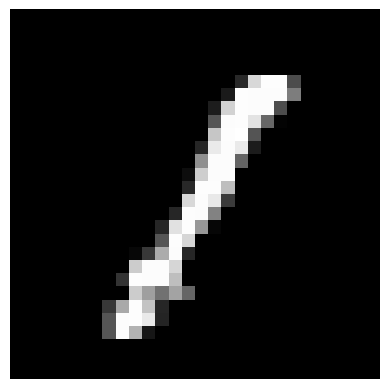

Predicted Label: 2


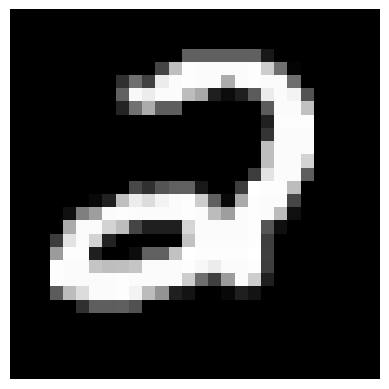

Predicted Label: 9


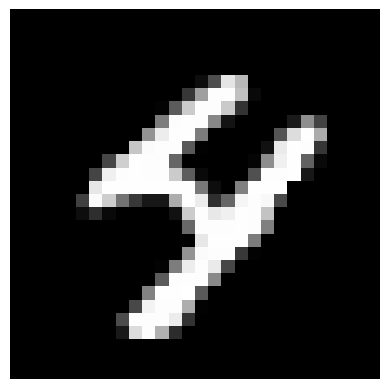

Predicted Label: 0


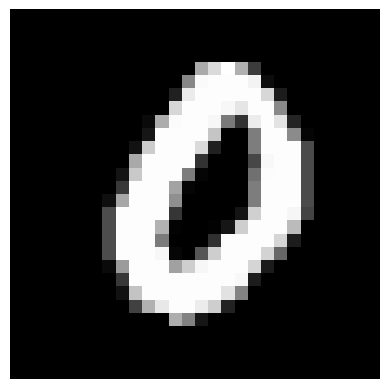

Predicted Label: 7


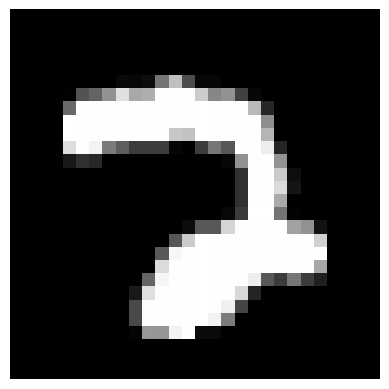

Predicted Label: 9


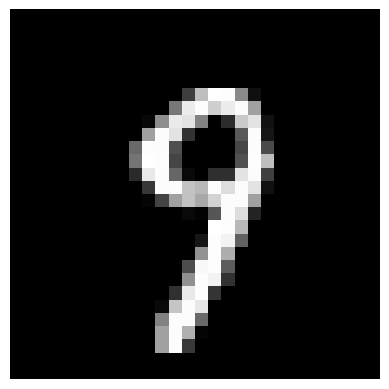

Predicted Label: 2


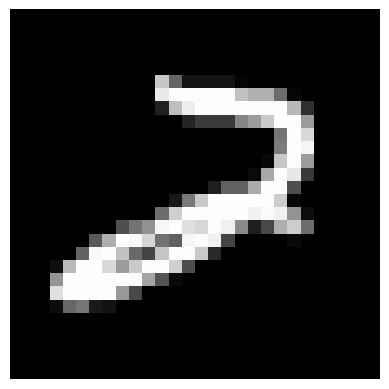

Predicted Label: 7


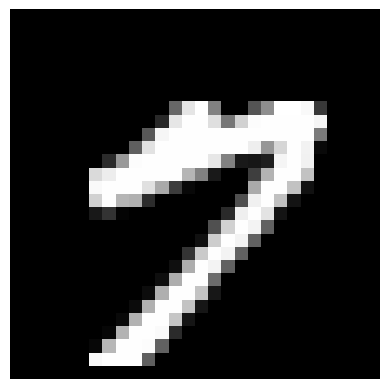

Predicted Label: 2


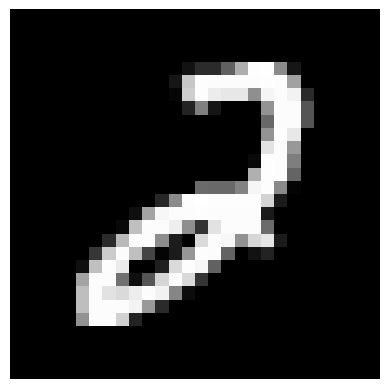

Predicted Label: 8


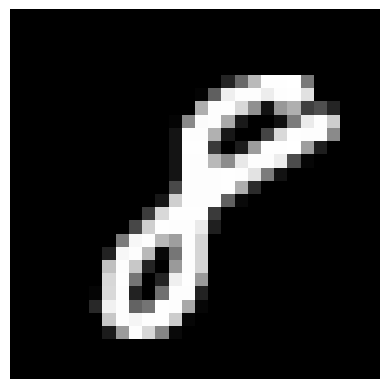

In [12]:
# check the prediction of 10 random images
import random

# Select 10 random indices from the test set
random_indices = random.sample(range(len(X_test)), 10)

# Predict and print the labels of the selected random images
for idx in random_indices:
    # Forward pass to get predictions for the current image
    current_image = X_test[:, idx:idx+1]
    Z1 = np.dot(W1, current_image) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = softmax(Z3)
    
    # Get the predicted label
    predicted_label = np.argmax(A3)
    
    # Print the predicted label
    print(f"Predicted Label: {predicted_label}")
    
    # Plot the image
    plt.imshow(current_image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()


# Neural Networks - The autoencoder **(5EC mandatory)**

You are going to train a neural network that is able to generate a new picture of a any on the 0..9 numbers. The shape of the NN resembles that of a bow tie:

- input layer ($l=0$): 784 nodes
- hidden layer ($l=1$): 300 nodes; ReLu activation function   (FIXED)
- hidden layer ($l=2$): 100 nodes; ReLu activation function   (FIXED)    
- hidden layer ($l=3$): 10 nodes; Softmax activation function  (FIXED)
- hidden layer ($l=4$): ? nodes; ? activation function
- hidden layer ($l=5$): ? nodes; ? activation function
- output layer ($l=6$): 784 nodes; ? activation function

You can train it by passing pictures trough it, the outgoing picture should be almost identical. Think about what loss function would be most appropriate here. Use the weights of the previously trained NN for the left side of the 'bow tie'. This setup is also known as an **autoencoder**. Layers 1-3 function as the _encoder_, wheras the layers 4-6 are the _decoder_. It can be used to find a compressed version of your input data. In case the loss is zero, you have obtained a perfect compression.

Once training is complete you can use the right hand side of the bow tie to generate a new image starting from the input vector, for example, a3 = np.zeros((10)),  a3[3]=1 and see if you get a figure back that resembles a 2.

**Deliverables:** 
1. A plot of 10 newly generated numbers with your network.
2. An outputweights.npz file with all weights and biases of your filal Neural Network (encoder and decoder)
3. A code to read in the outputweights.npz file and use the image generator

_Deliverable 1 could look like:_

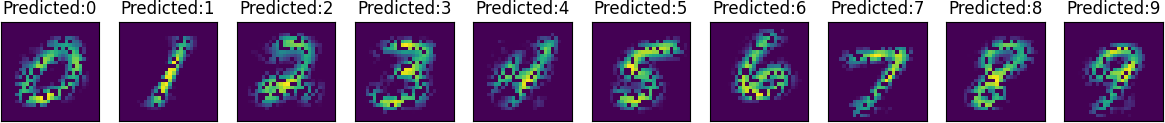
_It would be great if some of you manage to find a solution for the dark (missing) pixels!_     

_Or in case of the fashion set:_

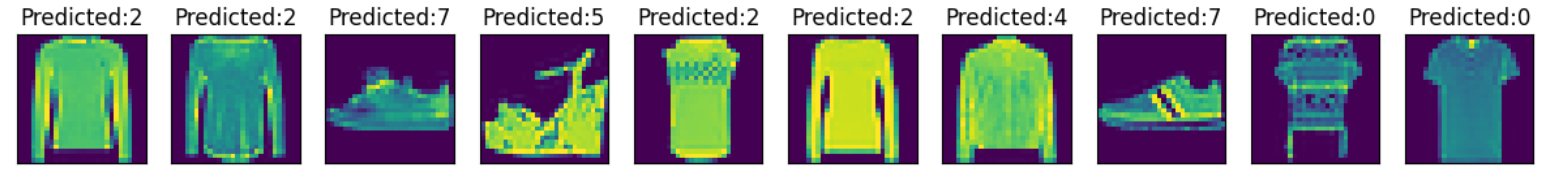

In [19]:
# Setup the Network

import numpy as np

# Set up the network architecture
input_size = 784
hidden_layer_sizes = [300, 100, 10, 100, 300]  # Sizes of the hidden layers
output_size = 784

# Initialize weights and biases for the encoder (layers 1-3)
encoder_weights = []
encoder_biases = []
prev_layer_size = input_size
for layer_size in hidden_layer_sizes[:3]:
    encoder_weights.append(np.random.randn(layer_size, prev_layer_size))
    encoder_biases.append(np.zeros((layer_size, 1)))
    prev_layer_size = layer_size

# Initialize weights and biases for the decoder (layers 4-6)
decoder_weights = []
decoder_biases = []
prev_layer_size = hidden_layer_sizes[2]  # Start from the last encoder layer
for layer_size in hidden_layer_sizes[3:]:
    decoder_weights.append(np.random.randn(layer_size, prev_layer_size))
    decoder_biases.append(np.zeros((layer_size, 1)))
    prev_layer_size = layer_size

# Add the output layer weights and biases for the decoder
decoder_weights.append(np.random.randn(output_size, prev_layer_size))
decoder_biases.append(np.zeros((output_size, 1)))

# Activation functions
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps, axis=0)

# Define the forward pass function
def forward_pass(X):
    # Encoder
    A = X
    encoder_activations = [A]
    for W, b in zip(encoder_weights, encoder_biases):
        Z = np.dot(W, A) + b
        A = relu(Z)
        encoder_activations.append(A)
    
    # Decoder
    for W, b in zip(decoder_weights, decoder_biases):
        Z = np.dot(W, A) + b
        A = relu(Z)  # Assuming ReLU activation for decoder layers
    
    return A


In [20]:
# Train the decoder



In [ ]:
# Test your image generation and improve your training procedure (hyperparameter tuning)



### Deliverable 1 

In [ ]:
# Prove that your network does what it should do and present your deliverable convincingly!



### Deliverable 2                

In [ ]:
## saves the obtained weights
#outfile='totalweightsNN.npz'
#np.savez(outfile, W1,...,b1,...)
#npzfile = np.load(outfile)
#npzfile.files
#W1=npzfile['arr_0']
#W1.shape


### Deliverable 3               